In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
import warnings


%matplotlib inline

In [3]:
k=pd.read_csv("data/k.csv",encoding="cp949")

In [4]:
k

,타임스탬프,학년,성별,학과,취미,휴대폰 이용 시간대,휴대폰 이용 시간,휴대폰으로 주로 하는것,자기 전 1시간 휴대폰 이용,전자기기 제외 주로 뭐 하는지,학교 수업 외로 하루 공부 시간,주로 공부하는 시간,학과 선택 만족,전공 취업 선호도,소셜 미디어 사용 시간,집에서 학교까지 오는시간,학업 스트레스,교우관계,아르바이트,방과후 수업
0,2023. 10. 12 오후 12:21:46,2,남자,창업마케팅과,운동,학교에서(9시~17시),3~5시간,SNS,한다,공부,1시간-2시간,방과후(저녁),O,5,1시간-2시간,10-30분,2,3,X,O
1,2023. 10. 12 오후 12:21:49,2,남자,창업마케팅과,게임,학교에서(9시~17시),7~9시간,"영상 시청(유튜브, OTT)",한다,TV 보기,0-30분,기타,O,5,2시간-3시간 이상,10-30분,3,2,X,O
2,2023. 10. 12 오후 12:23:07,3,남자,소프트웨어개발과,게임,학교에서(9시~17시),3~5시간,웹툰,한다,기타,0-30분,기타,O,7,1시간-2시간,10-30분,2,1,X,X
3,2023. 10. 12 오후 12:23:25,3,남자,소프트웨어개발과,게임,새벽에(00시~6시),5~7시간,SNS,한다,"문화생활(영화, 뮤지컬 등)",0-30분,밤,O,5,0-30분,10-30분,3,1,X,X
4,2023. 10. 12 오후 12:23:28,2,남자,창업마케팅과,음악,학교에서(9시~17시),5~7시간,웹툰,한다,기타,0-30분,기타,O,5,2시간-3시간 이상,1시간-2시간,1,1,O,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2023. 10. 13 오전 10:00:05,1,남자,부사관과,운동,학교에서(9시~17시),3~5시간,SNS,한다,스포츠 활동,0-30분,방과후(저녁),O,9,2시간-3시간 이상,30-1시간,1,2,O,X
261,2023. 10. 13 오전 10:30:19,1,여자,부사관과,게임,저녁에(17시~20시),3~5시간,SNS,한다,스포츠 활동,1시간-2시간,방과후(저녁),O,9,1시간-2시간,30-1시간,3,3,O,X
262,2023. 10. 13 오전 10:57:47,1,여자,부사관과,음악,저녁에(17시~20시),3~5시간,SNS,한다,TV 보기,1시간-2시간,방과후(저녁),O,10,1시간-2시간,30-1시간,2,2,X,X
263,2023. 10. 13 오후 2:57:37,2,남자,스마트웹콘텐츠과,게임,저녁에(17시~20시),3~5시간,"영상 시청(유튜브, OTT)",한다,"문화생활(영화, 뮤지컬 등)",30분-1시간,방과후(저녁),O,7,30-1시간,10-30분,2,2,X,X


In [5]:
a=pd.melt(k,id_vars=["학년"],value_vars=["소셜 미디어 사용 시간"])

In [6]:
ab

,학년,variable,value
0,2,소셜 미디어 사용 시간,1시간-2시간
1,2,소셜 미디어 사용 시간,2시간-3시간 이상
2,3,소셜 미디어 사용 시간,1시간-2시간
3,3,소셜 미디어 사용 시간,0-30분
4,2,소셜 미디어 사용 시간,2시간-3시간 이상
...,...,...,...
260,1,소셜 미디어 사용 시간,2시간-3시간 이상
261,1,소셜 미디어 사용 시간,1시간-2시간
262,1,소셜 미디어 사용 시간,1시간-2시간
263,2,소셜 미디어 사용 시간,30-1시간


In [18]:
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [19]:
male=k[k["성별"]=="남자"]
female=k[k["성별"]=="여자"]

a=k[k["학년"]==1]
b=k[k["학년"]==2]
c=k[k["학년"]==3]
new_df=pd.concat([a,b,c])

# **휴대폰 이용 시간**

In [55]:
colors = ['#DDF2EC', '#A5BAB4', '#A5B5AA',  '#8E8E8E','#DDE7D8',  '#FFE9D5']

studingTimeMale = male['휴대폰 이용 시간']
studingTimeMale = pd.DataFrame(studingTimeMale.value_counts())
studingTimeMale['index'] = studingTimeMale.index
studingTimeMale.index = [x for x in range(0,6)]



fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
fig.add_trace(go.Pie(labels=studingTimeMale['index'],values=studingTimeMale['휴대폰 이용 시간']),1,1)

fig.update_traces(hole=.4,hoverinfo="label+percent",marker=dict(colors=colors,line=dict(color='black', width=1)))
fig.update_layout(
title_text="하루 평균 휴대폰 이용 시간",title_x=0.47,font=dict(size=10),
    


)

fig.show()

*하루 평균*

***

하루 기준 3시간에서 5시간 휴대폰을 이용하는 학생이 40.7%로 가장 많으며, 1시간에서 3시간 이용하는 학생(25.4%)과 5시간에서 7시간 이용하는 학생(22%)이 그 다음으로 많다. 또한 1시간 미만으로 이용하는 학생들이 1.69%로 가장 적다. 청소년 휴대폰 하루 적정 이용 시간이 2시간임을 고려해 보았을 때, 많은 학생들(72.86%)이 이를 초과하여 과도하게 휴대폰을 이용하고 있다.

***

> ### *성별에 따른 휴대폰 이용 시간*

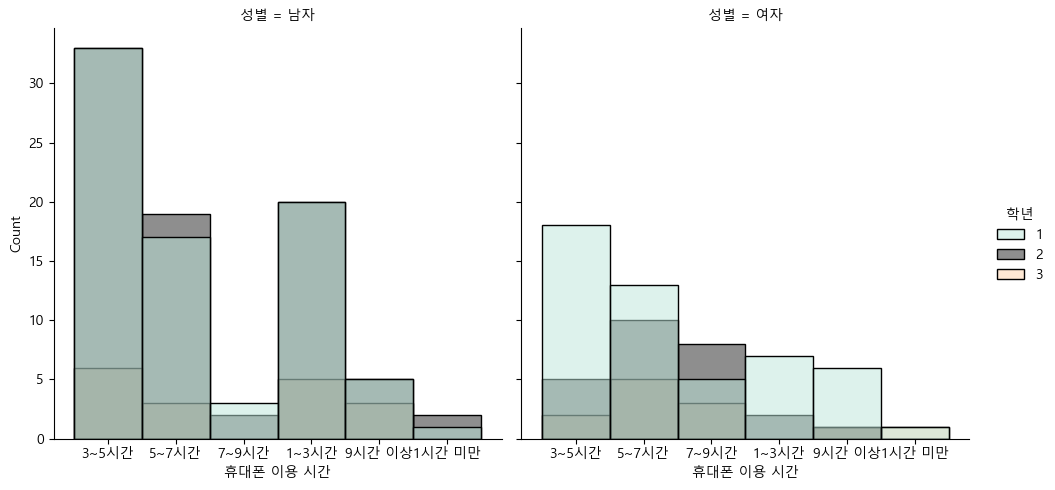

In [9]:
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False
sns.displot(data=new_df,x="휴대폰 이용 시간",hue="학년",col="성별",palette="icefire")

***

남학생과 여학생 모두 3시간에서 5시간 휴대폰을 이용하는 학생들이 가장 많다. 남학생은 1시간에서 3시간 이용하는 학생과 5시간에서 7시간 이용하는 학생이 그 다음으로 많고 7시간에서 9시간, 혹은 9시간 이상 이용하는 학생 수는 적은 반면, 여학생은 5시간에서 7시간, 7시간에서 9시간 이용하는 학생들이 그 다음으로 많고 1시간에서 3시간, 9시간 이상 이용하는 학생 수도 적지 않다. 여학생이 남학생에 비해 휴대폰 이용 시간이 많은 학생의 비율이 더 높음을 알 수 있다.


***

# **휴대폰으로 주로 사용하는 앱의 종류**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SNS'),
  Text(1, 0, '영상 시청(유튜브, OTT)'),
  Text(2, 0, '웹툰'),
  Text(3, 0, '게임'),
  Text(4, 0, '정보검색')])

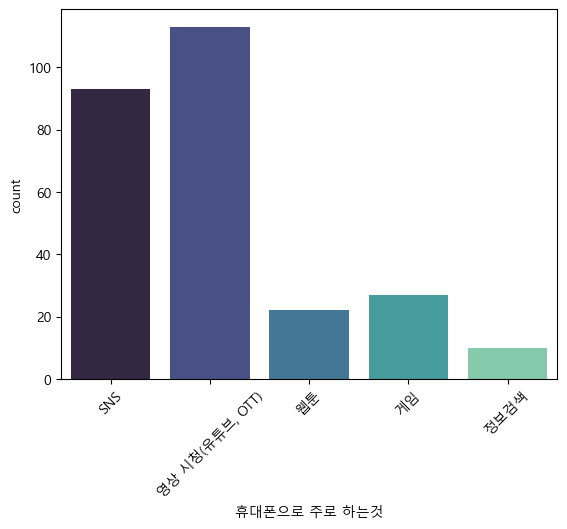

In [10]:
sns.countplot(data=k, x="휴대폰으로 주로 하는것",palette="mako")

plt.xticks(rotation=45, fontsize=10)

***


휴대폰은 디지털 게임 산업 대중화가 되어 있지 않아서 핸드폰 게임보단 유튜브 SNS같은 대중매체가 훨신 높은 선택율을 보이고 있다

***

> ### *성별에 따른 휴대폰으로 주로 사용하는 앱의 종류*

In [37]:
colors = ['#342741', '#495184', '#497a97', '#489d9f',  '#85caad']

studingTimeMale = male['휴대폰으로 주로 하는것']
studingTimeMale = pd.DataFrame(studingTimeMale.value_counts())
studingTimeMale['index'] = studingTimeMale.index
studingTimeMale.index = [x for x in range(0,5)]

studingTimeFemale = female['휴대폰으로 주로 하는것']
studingTimeFemale = pd.DataFrame(studingTimeFemale.value_counts())
studingTimeFemale['index'] = studingTimeFemale.index
studingTimeFemale.index = [x for x in range(0,5)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=studingTimeMale['index'],values=studingTimeMale['휴대폰으로 주로 하는것']),1,1)
fig.add_trace(go.Pie(labels=studingTimeFemale['index'],values=studingTimeFemale['휴대폰으로 주로 하는것']),1,2)
fig.update_traces(hole=.4,hoverinfo="label+percent",marker=dict(colors=colors,line=dict(color='black', width=1)))
fig.update_layout(
title_text="성별에 따른 휴대폰으로 주로 사용하는 앱의 종류",title_x=0.5,font=dict(size=10),
    
annotations = [dict(text='Male',x=0.20,y=0.5,font_size=12,showarrow=False),
                dict(text='Female',x=0.815,y=0.5,font_size=12,showarrow=False)]
)

fig.show()

***

여자는 주로 친구들과 메세지를 주고받거나 사진을 찍거나 통화를 하는등 사람들과의 소통을 많이하거나 대중문화를 좋아하기 때문에 SNS 사용 빈도가 높다

남자는 재미를 위해 예능, 드라마를 보거나 예능이나 드라마처럼 단지 재미로 게임 영상을 시청하거나 게임 전략을 세우기 위해 참고하려고 게임 영상을 보려고 하는 등 영상 시청의 비율이 여자에 비해 많다

여자와 남자 둘다 정보검색에 비중이 제일 낮은데 그 이유는 정보검색으로는 핸드폰보단 컴퓨터가 더 보기 쉽고 검색하기 편리 하기 때문이라고 추측할 수 있다

***

# **휴대폰 이용 시간대**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '아침(6시~9시)'),
  Text(1, 0, '학교에서(9시~17시)'),
  Text(2, 0, '저녁에(17시~20시)'),
  Text(3, 0, '밤에(20시~24시)'),
  Text(4, 0, '새벽에(00시~6시)')])

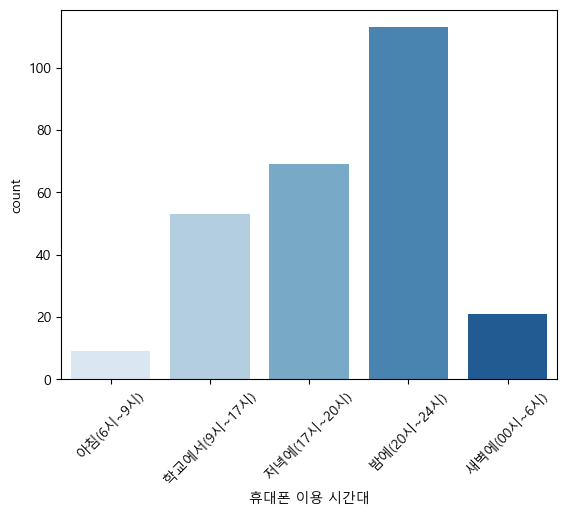

In [57]:
sns.countplot(data=k, x="휴대폰 이용 시간대",palette="Blues",order=['아침(6시~9시)','학교에서(9시~17시)','저녁에(17시~20시)','밤에(20시~24시)','새벽에(00시~6시)'])
plt.xticks(rotation=45, fontsize=10)

***

성일정보고등학교의 학생들은 보통 학교 생활,사회 생활을 중점으로 두고 있기 때문에 학교나 저녁에는 수업이나 공부, 알바, 회사 등 여러 일을 하고 있어 핸드폰을 잘 사용하지 않지만, 모든 일이 끝난 밤에는 확실히 핸드폰 사용 빈도가 높다.

아침은 등교나 츌근로 인해 사용 비율이 낮고, 새벽은 빠른 취침과 기상을 위해 숙면을 취하는 경우가 있어 사용 비율이 낮다.

***

> ### *학년에 따른 휴대폰 이용 시간대*

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '밤에(20시~24시)'),
  Text(1, 0, '저녁에(17시~20시)'),
  Text(2, 0, '학교에서(9시~17시)'),
  Text(3, 0, '아침(6시~9시)'),
  Text(4, 0, '새벽에(00시~6시)')])

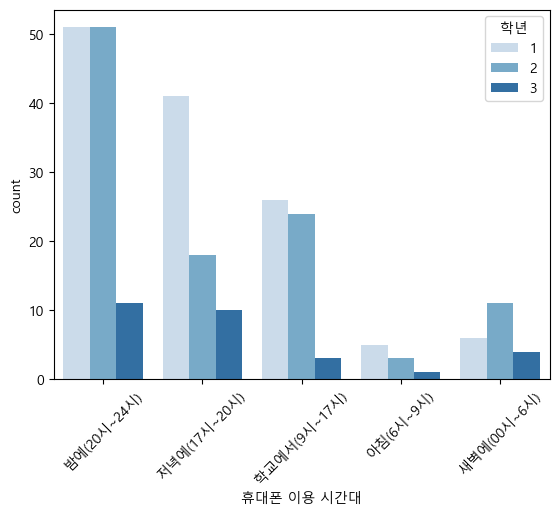

In [13]:
sns.countplot(data=new_df, x="휴대폰 이용 시간대",hue="학년",palette="Blues")
plt.xticks(rotation=45, fontsize=10)

***

In [14]:
colors = ['#cdd9e2', '#c9dce9', '#78aace','#4a85b0', '#205b91']

Grade1 = a['휴대폰 이용 시간대']
Grade1 = pd.DataFrame(Grade1.value_counts())
Grade1['index'] = Grade1.index
Grade1.index = [x for x in range(0,5)]

Grade2 = b['휴대폰 이용 시간대']
Grade2 = pd.DataFrame(Grade2.value_counts())
Grade2['index'] = Grade2.index
Grade2.index = [x for x in range(0,5)]

Grade3 = c['휴대폰 이용 시간대']
Grade3 = pd.DataFrame(Grade3.value_counts())
Grade3['index'] = Grade3.index
Grade3.index = [x for x in range(0,5)]

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=Grade1['index'],values=Grade1['휴대폰 이용 시간대']),1,1)
fig.add_trace(go.Pie(labels=Grade2['index'],values=Grade2['휴대폰 이용 시간대']),1,2)
fig.add_trace(go.Pie(labels=Grade3['index'],values=Grade3['휴대폰 이용 시간대']),1,3)
fig.update_traces(hole=.4,hoverinfo="label+percent",marker=dict(colors=colors,line=dict(color='black', width=1)))
fig.update_layout(
title_text="학년별 휴대폰 이용 시간대",title_x=0.5,font=dict(size=10),
    
annotations = [dict(text='1',x=0.13,y=0.5,font_size=12,showarrow=False),
                dict(text='2',x=0.5,y=0.5,font_size=12,showarrow=False),
              dict(text='3',x=0.867,y=0.5,font_size=12,showarrow=False)]
)

fig.show()

***

아침에는 학교나 회사에 출근으로 인한 핸드폰사용이 적어 아침에 주로 사용하는 사람이 적다

모든 학년 다 아침에는 학교 갈 준비를 하고 학교에서는 친구랑 노는게 더 비중이 높고 저녁시간에는 하교를 한다거나 학원, 방과후 때문에 핸드폰 사용을 하지 않는데 일과를 다 마친 밤에 하는 사람들이 많아서 밤에의 비중이 높다

3학년은 취업을 나가기 때문에 학교에 있는 시간이 적어서 학교에서 시간대의 비율이 다른 학년들에 비해 확실히 적다

***

> ### *성별에 따른 휴대폰 이용 시간대*

In [15]:
colors = ['#cdd9e2', '#c9dce9', '#78aace','#4a85b0', '#205b91']

studingTimeMale = male['휴대폰 이용 시간대']
studingTimeMale = pd.DataFrame(studingTimeMale.value_counts())
studingTimeMale['index'] = studingTimeMale.index
studingTimeMale.index = [x for x in range(0,5)]

studingTimeFemale = female['휴대폰 이용 시간대']
studingTimeFemale = pd.DataFrame(studingTimeFemale.value_counts())
studingTimeFemale['index'] = studingTimeFemale.index
studingTimeFemale.index = [x for x in range(0,5)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=studingTimeMale['index'],values=studingTimeMale['휴대폰 이용 시간대']),1,1)
fig.add_trace(go.Pie(labels=studingTimeFemale['index'],values=studingTimeFemale['휴대폰 이용 시간대']),1,2)
fig.update_traces(hole=.4,hoverinfo="label+percent",marker=dict(colors=colors,line=dict(color='black', width=1)))
fig.update_layout(
title_text="성별에 따른 휴대폰 이용 시간대",title_x=0.5,font=dict(size=10),
    
annotations = [dict(text='Male',x=0.20,y=0.5,font_size=12,showarrow=False),
                dict(text='Female',x=0.815,y=0.5,font_size=12,showarrow=False)]
)

fig.show()

남학생과 여학생 모두 아침에 학교 갈 준비를 하거나 취업한 학생들은 회사 갈 준비를 위해서 아침이 제일 적고 일과를 다 마친 밤 시간대가 가장 많다

# **전자기기 제외 여가시간에 주로 하는 것**

> ### *학년에 따른 전자기기 제외 여가시간에 주로 하는 것*

In [16]:
Grade1 = a['전자기기 제외 주로 뭐 하는지']
Grade1 = pd.DataFrame(Grade1.value_counts())
Grade1['index'] = Grade1.index
Grade1.index = [x for x in range(0,5)]

Grade2 = b['전자기기 제외 주로 뭐 하는지']
Grade2 = pd.DataFrame(Grade2.value_counts())
Grade2['index'] = Grade2.index
Grade2.index = [x for x in range(0,5)]

Grade3 = c['전자기기 제외 주로 뭐 하는지']
Grade3 = pd.DataFrame(Grade3.value_counts())
Grade3['index'] = Grade3.index
Grade3.index = [x for x in range(0,5)]

colors = ['#DBDCFF', '#C5C6E5', '#9D9EB7', '#898AA0',  '#767689', '#626372']

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=Grade1['index'],values=Grade1['전자기기 제외 주로 뭐 하는지']),1,1)
fig.add_trace(go.Pie(labels=Grade2['index'],values=Grade2['전자기기 제외 주로 뭐 하는지']),1,2)
fig.add_trace(go.Pie(labels=Grade3['index'],values=Grade3['전자기기 제외 주로 뭐 하는지']),1,3)

fig.update_traces(hole=.4,hoverinfo="label+percent",marker=dict(colors=colors,line=dict(color='black', width=1)))

fig.update_layout(
title_text="학년별 전자기기 제외 여가시간에 주로 하는 것",title_x=0.5,font=dict(size=10),
    
annotations = [dict(text='1',x=0.13,y=0.5,font_size=12,showarrow=False),
                dict(text='2',x=0.5,y=0.5,font_size=12,showarrow=False),
              dict(text='3',x=0.867,y=0.5,font_size=12,showarrow=False)]
)
fig.show()

*전자기기(컴퓨터, 휴대폰)*

***

3학년은 공부를 하지 않고 취업을 한후 사회생활에 적응을 하기위해 문화생활로 정보를 얻거나 사회생활로 지친 몸을 풀기위해 문화생활을 하는 경우도 많다

1학년과 2학년은 내신 준비와 취업 준비를 위한 공부 자기관리를 위한 운동 이 많지만 3학년은 취업으로 인한 스트레스로 집에있지 않고 밖에 나가 문화생활을 즐기기때문에 1,2학년과 그래프가 확실히 다르다


1, 2학년은 자격증 공부를 하거나 내신을 따기 위해 중간, 기말고사 준비를 하기 때문에 공부량이 비슷한것에 비해 3학년은 이제 내신이 거의 끝나서 자격증 공부나 중간, 기말을 대비할 필요가 없어서 1,2학년에 비해 공부량이 적다

***

> ### *성별에 따른 전자기기 제외 여가시간에 주로 하는 것*

In [23]:
colors = ['#DBDCFF', '#C5C6E5', '#9D9EB7', '#898AA0',  '#767689', '#626372']

studingTimeMale = male['전자기기 제외 주로 뭐 하는지']
studingTimeMale = pd.DataFrame(studingTimeMale.value_counts())
studingTimeMale['index'] = studingTimeMale.index
studingTimeMale.index = [x for x in range(0,5)]

studingTimeFemale = female['전자기기 제외 주로 뭐 하는지']
studingTimeFemale = pd.DataFrame(studingTimeFemale.value_counts())
studingTimeFemale['index'] = studingTimeFemale.index
studingTimeFemale.index = [x for x in range(0,5)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=studingTimeMale['index'],values=studingTimeMale['전자기기 제외 주로 뭐 하는지']),1,1)
fig.add_trace(go.Pie(labels=studingTimeFemale['index'],values=studingTimeFemale['전자기기 제외 주로 뭐 하는지']),1,2)
fig.update_traces(hole=.4,hoverinfo="label+percent",marker=dict(colors=colors,line=dict(color='black', width=1)))
fig.update_layout(
title_text="성별에 따른 전자기기 제외 여가시간에 주로 하는 것",title_x=0.5,font=dict(size=10),
    
annotations = [dict(text='Male',x=0.20,y=0.5,font_size=12,showarrow=False),
                dict(text='Female',x=0.815,y=0.5,font_size=12,showarrow=False)]
)

fig.show()

남학생과 여학생 둘다 공부 말고 할게 많기도 하고 공부가 중요하긴 하지만 하기 싫어서 공부가 제일 적다

운동을 전문으로 하는 부사관과에 남학생들이 많기도 하고 타 과에서도 운동에 관심이 많아서 헬스나 축구 같은 것을 하는 스포츠 활동이 가장 높다

여학생은 

***

# **일평균 소셜미디어 사용 시간**

> ### *학년에 따른 일평균 소셜미디어 사용 시간*

In [22]:
Grade1 = a['소셜 미디어 사용 시간']
Grade1 = pd.DataFrame(Grade1.value_counts())
Grade1['index'] = Grade1.index
Grade1.index = [x for x in range(0,4)]

Grade2 = b['소셜 미디어 사용 시간']
Grade2 = pd.DataFrame(Grade2.value_counts())
Grade2['index'] = Grade2.index
Grade2.index = [x for x in range(0,4)]

Grade3 = c['소셜 미디어 사용 시간']
Grade3 = pd.DataFrame(Grade3.value_counts())
Grade3['index'] = Grade3.index
Grade3.index = [x for x in range(0,4)]

colors = ['#778899', '#B0C4DE', '#E6E6FA', '#FFFAF0']

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=Grade1['index'],values=Grade1['소셜 미디어 사용 시간']),1,1)
fig.add_trace(go.Pie(labels=Grade2['index'],values=Grade2['소셜 미디어 사용 시간']),1,2)
fig.add_trace(go.Pie(labels=Grade3['index'],values=Grade3['소셜 미디어 사용 시간']),1,3)

fig.update_traces(hole=.4,hoverinfo="label+percent",marker=dict(colors=colors,line=dict(color='black', width=1)))

fig.update_layout(
title_text="학년에 따른 일평균 소셜미디어 사용 시간",title_x=0.5,font=dict(size=10),
    
annotations = [dict(text='1',x=0.13,y=0.5,font_size=12,showarrow=False),
                dict(text='2',x=0.5,y=0.5,font_size=12,showarrow=False),
              dict(text='3',x=0.867,y=0.5,font_size=12,showarrow=False)]
)
fig.show()

***

> ### *성별에 따른 일평균 소셜미디어 사용 시간*

In [21]:
colors = ['#778899', '#B0C4DE', '#E6E6FA', '#FFFAF0']

studingTimeMale = male['소셜 미디어 사용 시간']
studingTimeMale = pd.DataFrame(studingTimeMale.value_counts())
studingTimeMale['index'] = studingTimeMale.index
studingTimeMale.index = [x for x in range(0,4)]

studingTimeFemale = female['소셜 미디어 사용 시간']
studingTimeFemale = pd.DataFrame(studingTimeFemale.value_counts())
studingTimeFemale['index'] = studingTimeFemale.index
studingTimeFemale.index = [x for x in range(0,4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=studingTimeMale['index'],values=studingTimeMale['소셜 미디어 사용 시간']),1,1)
fig.add_trace(go.Pie(labels=studingTimeFemale['index'],values=studingTimeFemale['소셜 미디어 사용 시간']),1,2)
fig.update_traces(hole=.4,hoverinfo="label+percent",marker=dict(colors=colors,line=dict(color='black', width=1)))
fig.update_layout(
title_text="성별에 따른 일평균 소셜미디어 사용 시간",title_x=0.5,font=dict(size=10),
    
annotations = [dict(text='Male',x=0.20,y=0.5,font_size=12,showarrow=False),
                dict(text='Female',x=0.815,y=0.5,font_size=12,showarrow=False)]
)

fig.show()


***

# **하루 공부 시간과 휴대폰 이용 시간의 상관관계**

<Figure size 10000x10000 with 0 Axes>

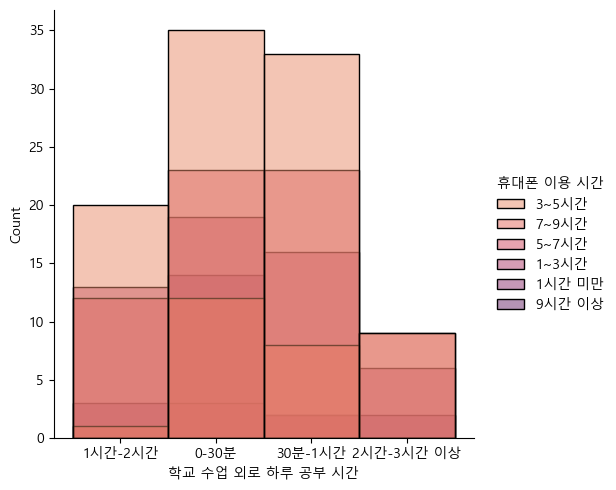

In [52]:
plt.figure(figsize=(100, 100))
sns.displot(data=k,x="학교 수업 외로 하루 공부 시간",hue="휴대폰 이용 시간",palette="flare")


***

# **휴대폰 이용 시간과 학업 스트레스의 상관관계**

<Figure size 10000x10000 with 0 Axes>

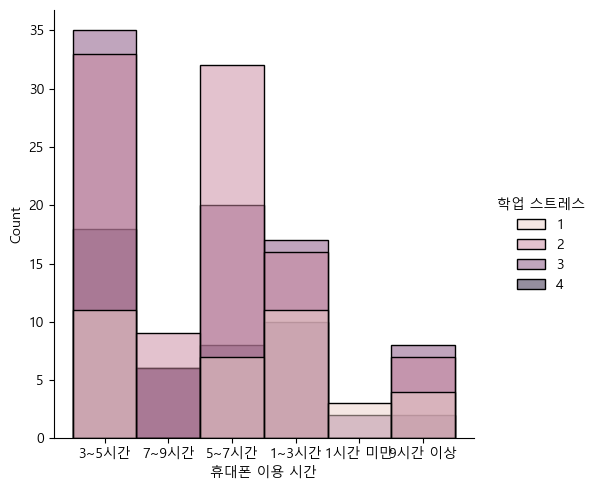

In [53]:
plt.figure(figsize=(100, 100))
sns.displot(data=k,x="휴대폰 이용 시간",hue="학업 스트레스")


***

# **결론**

성일정보고등학교 학생들의 휴대폰